# Perceptron

The perceptron is a mathematical model of a biological neuron. While in actual neurons the dendrite receives electrical signals from the axons of other neurons, in the perceptron these electrical signals are represented as numerical values. At the synapses between the dendrite and axons, electrical signals are modulated in various amounts. This is also modeled in the perceptron by multiplying each input value by a value called the weight. An actual neuron fires an output signal only when the total strength of the input signals exceed a certain threshold. We model this phenomenon in a perceptron by calculating the weighted sum of the inputs to represent the total strength of the input signals, and applying a step function on the sum to determine its output. As in biological neural networks, this output is fed to other perceptrons. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
%matplotlib nbagg

Load CSV data files using pandas module.

In [2]:
data_1 = pd.read_csv('./Data/datafile1.csv', names = ['x1', 'x2', 'Class'])
data_2 = pd.read_csv('./Data/datafile2.csv', names = ['x1', 'x2', 'Class'])
data_3 = pd.read_csv('./Data/datafile3.csv', names = ['x1', 'x2', 'Class'])
data_4 = pd.read_csv('./Data/datafile4.csv', names = ['x1', 'x2', 'Class'])

Plot each data set using scatter plot function of **matplotlib** module to visualize the data and try to find the dataset which is linerly separable.

### DATA SET 1

<IPython.core.display.Javascript object>


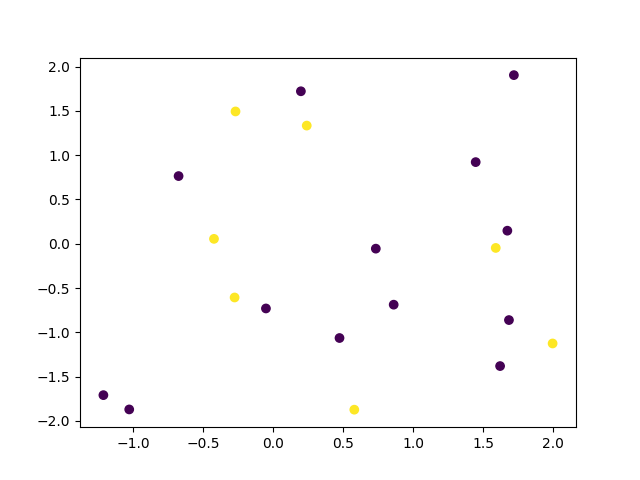

In [8]:
plt.scatter(data_1.x1, data_2.x2, c = data_1.Class)
plt.show()

### DATA SET 2

<IPython.core.display.Javascript object>


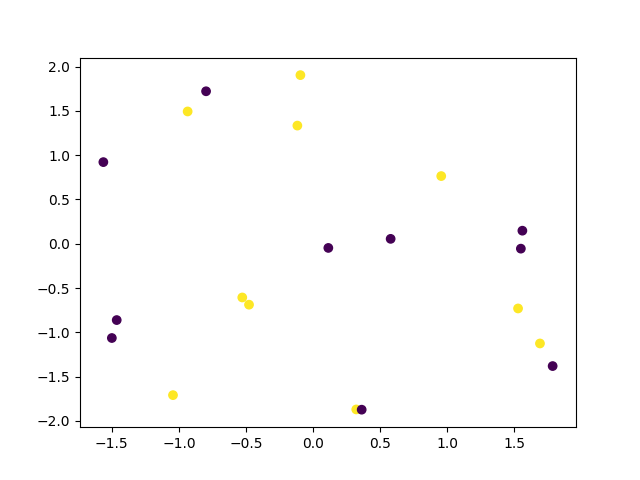

In [9]:
plt.scatter(data_2.x1, data_2.x2, c = data_2.Class)
plt.show()

### DATA SET 3

<IPython.core.display.Javascript object>


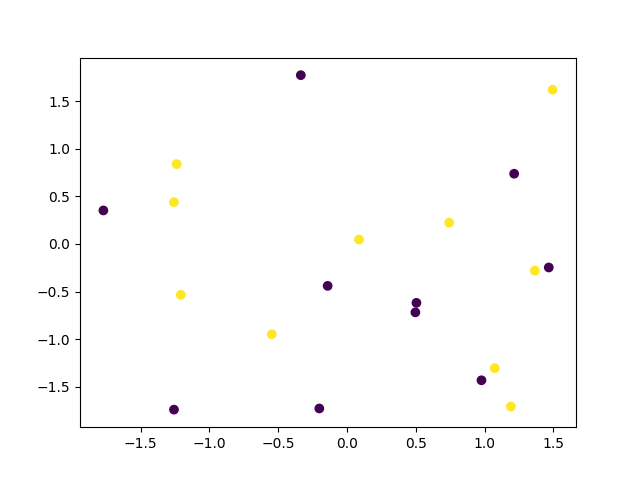

In [10]:
plt.scatter(data_3.x1, data_3.x2, c = data_3.Class)
plt.show()

### DATA SET 4

<IPython.core.display.Javascript object>


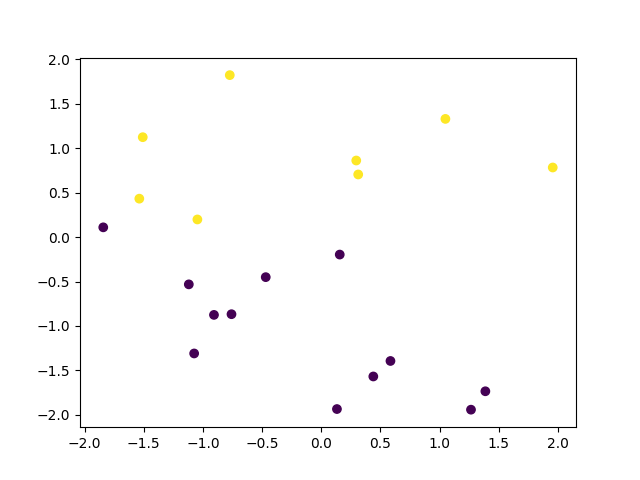

In [11]:
plt.scatter(data_4.x1, data_4.x2, c = data_4.Class)
plt.show()

From the above four plots DataSets Data Set #4 is linearly separable.

# Perception Training

The perceptron is simply separating the input into 2 categories, those that cause a fire, and those that don't. It does this by looking at (in the 2-dimensional case):

    w1I1 + w2I2 < t 

If the LHS is < t, it doesn't fire, otherwise it fires. That is, it is drawing the line:

    w1I1 + w2I2 = t 

and looking at where the input point lies. Points on one side of the line fall into 1 category, points on the other side fall into the other category. And because the weights and thresholds can be anything, this is just any line across the 2 dimensional input space.

So what the perceptron is doing is simply drawing a line across the 2-d input space. Inputs to one side of the line are classified into one category, inputs on the other side are classified into another. e.g. the OR perceptron, w1=1,   w2=1,   t=0.5, draws the line:

    I1 + I2 = 0.5 

### Perception Algorithm

Step1: Initialize weights and thresholds: Set the $ w_{ij} $ and the $ b_{j} $ to small random values in the range [-1, +1].

Step2: Present new continuous valued input $ p_{0}, p_{1}, p_{2}, ...,p_{n} $ along with the desired output vector $ T = (t_{0},...,t_{n}). $

Step3: Calculate actual output: $ a_{j} = f(Σ(w_{ij}*p_{i}) +b_{j}). $

Step 4: When an error occurs adapt the weights with: $ w_{ij}^{new} = w_{ij}^{old} + η[t_{j} - a_{j}]*p_{i} $ where: $ 0 < η= < 1 $ (learning rate) and: $ b^{new} = b_{old} + e $
where: $e = η[t_{j} - a_{j}]$

Step 5: Repeat by going to step 2 until no error.



Rosenblatt's classic perceptron algorithm, the weights are simultaneously updated after every training example via

$Δw^{(t+1)}=Δw^{(t)}+η(target−actual)x_{i}$

where $eta$ is the learning rule here. And target and actual are both thresholded (-1 or 1). I implemented it as 1 iteration = 1 pass over the training sample, but the weight vector is updated after each training sample.

And calculate the "actual" value as

$sign(w^{T}x)=sign(w_{0}+w_{1}x_{1}+...+w_{d}x_{d})$

### Stochastic gradient descent

$Δw^{(t+1)}=Δw^{(t)}+η(target−actual)x_{i}$

Same as the perceptron rule, however, target and actual are not thresholded but real values. Also, count "iteration" as path over the training sample.

Both, SGD and the classic perceptron rule converge in this linearly separable case, however, I am having troubles with the gradient descent implementation.

### Gradient Descent

Here, I go over the training sample and sum up the weight changes for 1 pass over the training sample and updated the weights thereafter, e.g,

for each training sample:

$Δw^{new}+=Δw^{(t)}+η(target−actual)x_{i}$

after 1 pass over the training set:

$Δw+=Δw^{new}$

In [12]:
learning_rate = 0.005
X = np.column_stack((np.ones(20), data_4.x1, data_4.x1))
Y = np.column_stack((data_4.Class))
W = np.random.random_sample(3).reshape(3,1)
iterns = 10
weights1 = []
for i in range(0, iterns):
    Y_pred = X.dot(W) 
    Y_pred[Y_pred >=  0] = 1
    Y_pred[Y_pred < 0] = 0
    del_W = learning_rate *((Y-Y_pred.T).dot(X))
    W = W + del_W.T
    weights1.append(W)
    if np.sum(np.abs((Y.T - (Y_pred))))==0:
        print(i)
        break


In [13]:
a = weights1[9] #[[-0.06151203], [-0.01605306], [ 0.1430823 ]]

In [ ]:
X1 = [-2,-1,0,-1,2]
Y1 = []
for i in X1:
    Y1.append(-(W[1]/W[2])*i - (W[0]/W[2]))

In [ ]:
%matplotlib inline
plt.scatter(data_4.x1, data_4.x2, c = data_4.Class)
plt.plot(X1,Y1)
plt.grid()
plt.show()

In [3]:
learning_rate = 0.005
W = np.random.random_sample(3).reshape(3,1)
itern = 0
weights = []  
while itern < 20:
    for j in range(len(data_4)):
        y_sum = ((data_4.loc[j,'x1'] * W[1]) + (data_4.loc[j,'x2'] * W[2]) + W[0])
        y_pred = 0
        if y_sum >= 0:
            y_pred = 1
        delta_w0 = learning_rate * (y_pred - data_4.loc[j,'Class'])
        delta_w1 = learning_rate * (y_pred - data_4.loc[j,'Class']) * (data_4.loc[j,'x1'])
        delta_w2 = learning_rate * (y_pred - data_4.loc[j,'Class']) * (data_4.loc[j,'x2'])
        W[0] = W[0] + delta_w0
        W[1] = W[1] + delta_w1 
        W[2] = W[2] + delta_w1
    a = np.column_stack(([W[0][0]],[W[1][0]],[W[2][0]])).reshape(3,1)
    weights.append(a)
    print('epoch : ',itern, ' W1 : ', W[1], ' W2 : ', W[2])
    itern = itern + 1

epoch :  0  W1 :  [ 0.81530876]  W2 :  [ 0.14407154]
epoch :  1  W1 :  [ 0.85324717]  W2 :  [ 0.18200995]
epoch :  2  W1 :  [ 0.89118558]  W2 :  [ 0.21994837]
epoch :  3  W1 :  [ 0.929124]  W2 :  [ 0.25788678]
epoch :  4  W1 :  [ 0.96706241]  W2 :  [ 0.29582519]
epoch :  5  W1 :  [ 1.00500082]  W2 :  [ 0.33376361]
epoch :  6  W1 :  [ 1.04293924]  W2 :  [ 0.37170202]
epoch :  7  W1 :  [ 1.08087765]  W2 :  [ 0.40964043]
epoch :  8  W1 :  [ 1.11881607]  W2 :  [ 0.44757885]
epoch :  9  W1 :  [ 1.15675448]  W2 :  [ 0.48551726]
epoch :  10  W1 :  [ 1.19469289]  W2 :  [ 0.52345568]
epoch :  11  W1 :  [ 1.23263131]  W2 :  [ 0.56139409]
epoch :  12  W1 :  [ 1.26990879]  W2 :  [ 0.59867157]
epoch :  13  W1 :  [ 1.30718627]  W2 :  [ 0.63594906]
epoch :  14  W1 :  [ 1.34446376]  W2 :  [ 0.67322654]
epoch :  15  W1 :  [ 1.38174124]  W2 :  [ 0.71050402]
epoch :  16  W1 :  [ 1.41901872]  W2 :  [ 0.7477815]
epoch :  17  W1 :  [ 1.4562962]  W2 :  [ 0.78505899]
epoch :  18  W1 :  [ 1.49592126]  W2 :  [ 

In [4]:
X1 = [-2,-1,0,-1,2]
Y1 = []
for i in X1:
    Y1.append(-(W[1]/W[2])*i - (W[0]/W[2]))

<IPython.core.display.Javascript object>


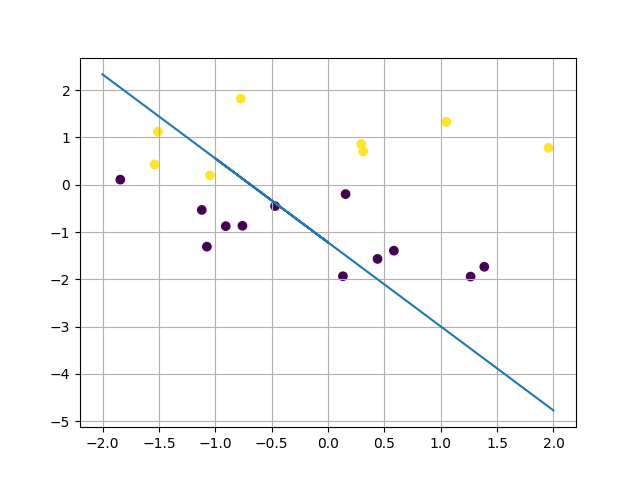

In [5]:
plt.scatter(data_4.x1, data_4.x2, c = data_4.Class)
plt.plot(X1,Y1)
plt.grid()
plt.show()

In [6]:
def approx_func(x, w):
    return (-(w[1]/w[2])*x - (w[0]/w[2]))

<IPython.core.display.Javascript object>


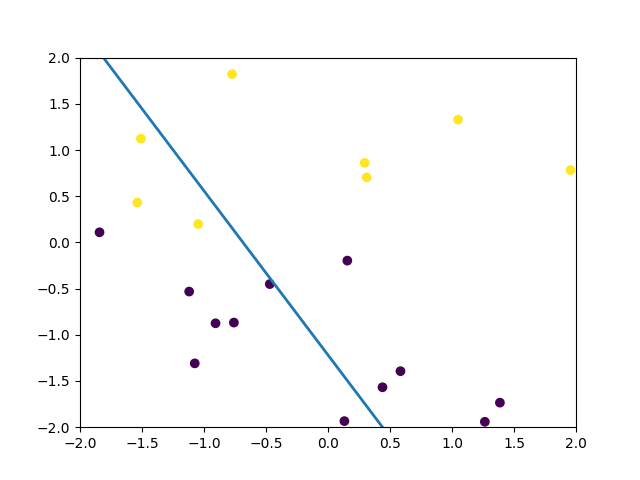

In [7]:
%matplotlib nbagg
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x1 = data_4['x1']
x2 = data_4['x2']
y = data_4['Class']
w = weights

ax.scatter(x1, x2, c=y)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = [min(x1),max(x1)]
    y = approx_func(x,w[i])
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(weights), interval=200, blit=True, repeat=False)


plt.show()